In [20]:
import tensorflow as tf

# 1. Build Sequential Model

In [21]:
# define model by stacking layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])

# compile model by setting loss function, optimizer, etc
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

## 2. Train Model

In [22]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# train
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 1.5545 - accuracy: 0.9141
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 1.5056 - accuracy: 0.9567
Epoch 3/5
60000/60000 [==============================] - 7s 115us/sample - loss: 1.4964 - accuracy: 0.9656
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 1.4909 - accuracy: 0.9705
Epoch 5/5
60000/60000 [==============================] - 7s 114us/sample - loss: 1.4880 - accuracy: 0.9735


## 3. Test and Evaluation

In [23]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 1.4925 - accuracy: 0.9688


25/25 - 0s - loss: 1.4628 - accuracy: 1.0000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



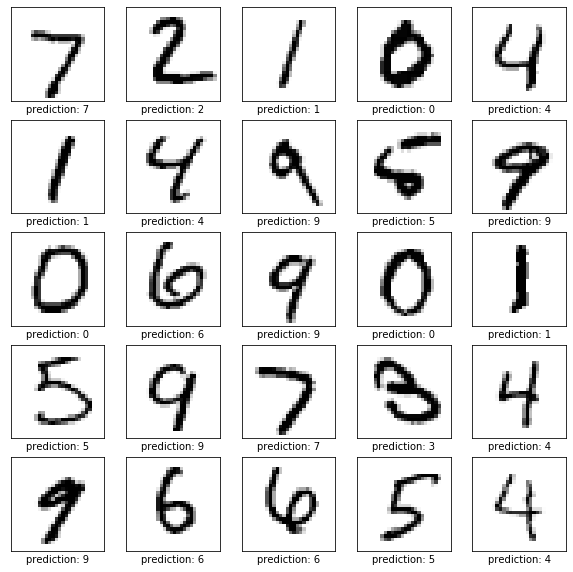

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# evaluation
def evaluate(x, y):    
    loss, accuracy = model.evaluate(x,  y, verbose=2)
    y_ = model(x)
    label = tf.argmax(y_, 1).numpy()
    return accuracy, label

num = 5
acc, predicted_y = evaluate(x_test[:num**2], y_test[:num**2])

# plots
plt.figure(figsize=(10,10))
for i in range(num**2):
    plt.subplot(num, num,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'prediction: {predicted_y[i]}')
    
    # mark error prediction with red border
    if y_test[i] != predicted_y[i]:
        ax = plt.gca()
        for name, border in ax.spines.items():
            border.set_color('red')
plt.show()

## 4. Save and Restore Model

- save entire model, including:
    - The model's architecture
    - The model's weight values learned during training
    - The model's training config passed to `compile()` if any
- save mdoel architecture only
- save model weights only

https://tensorflow.google.cn/guide/keras/save_and_serialize

In [26]:
# Save the model
path = 'ckpt_nn/mnist_model.h5'
model.save(path)
predictions = model.predict(x_test)

In [28]:
# Recreate the exact same model purely from the file
new_model = tf.keras.models.load_model(path)
new_predictions = new_model.predict(x_test)

In [30]:
# compare results
import numpy as np
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)